In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import re

import os

import pandas as pd
from reconchess import GameHistory, WinReason
import matplotlib.pyplot as plt
import numpy as np
from typing import List
import json

In [14]:
def draw_graph(data, **kwargs):
    # Draw graph
    X = list(data.keys())
    cat = list(data.values())[0].keys()
      
    X_axis = np.arange(len(X)) 
    
    for ind, key in enumerate(cat):
        bottom = np.zeros_like(data.values())
        for subkey in list(data.values())[0][key].keys():
            val = [r[key][subkey] for r in data.values()]
            plt.bar(X_axis + (0.8/len(cat) * (-1 + (2 * ind + 1)/len(cat))), val, 0.8/len(cat), label = key+subkey, bottom=bottom)
            bottom = val
      
    plt.xticks(X_axis, X) 
    plt.xlabel(kwargs.get("x_label")) 
    plt.title(kwargs.get("title")) 
    plt.legend() 
    plt.show()

In [40]:
def analyse(path):
    
    games = os.listdir(path)
    
    games = [os.path.join(path, game_id, f"game_{game_id}.log") for game_id in games]
    
    games = [x for x in games if os.path.exists(x)]
    game_hists: List[GameHistory] = [GameHistory.from_file(x) for x in games]
    
    print(f"Total games: {len(game_hists)}")
    
    print(f"Games won: {sum([(game.get_white_player_name() == 'Zubat') == game.get_winner_color() for game in game_hists])}")
    
    opponents = (
        {game.get_white_player_name() for game in game_hists}.union(
        {game.get_black_player_name() for game in game_hists}) -
        {"Zubat"}
    )
    print(f"Opponents: {opponents}")
    
    grouped_games = {
        opp: [game for game in game_hists if game.get_white_player_name() == opp or game.get_black_player_name() == opp]
        for opp in opponents
    }
    lengths = {
        opp: {
            "wins": {"": np.average([game.num_turns() for game in games if (game.get_white_player_name() == "Zubat") == game.get_winner_color()])},
            "losses": {"": np.average([game.num_turns() for game in games if (game.get_white_player_name() == "Zubat") != game.get_winner_color()])}
        }
        for opp, games in grouped_games.items()
    }
    # print(f"Game lengths: \n{json.dumps(lengths, indent=2)}")
    results = {
        opp: {
            "wins": {
                " via king capture": len([game for game in games if (((game.get_white_player_name() == "Zubat") == game.get_winner_color()) and game.get_win_reason() == WinReason.KING_CAPTURE)]),
                " via timeout": len([game for game in games if (((game.get_white_player_name() == "Zubat") == game.get_winner_color()) and game.get_win_reason() != WinReason.KING_CAPTURE)]),
            },
            "losses": {
                " via king capture": len([game for game in games if (((game.get_white_player_name() == "Zubat") != game.get_winner_color()) and game.get_win_reason() == WinReason.KING_CAPTURE) and (game.get_winner_color() is not None)]),
                " via timeout": len([game for game in games if (((game.get_white_player_name() == "Zubat") != game.get_winner_color()) and game.get_win_reason() != WinReason.KING_CAPTURE) and (game.get_winner_color() is not None)]),
            },
            "ties": {
                "": len([game for game in games if game.get_winner_color() is None])
            }
        }
        for opp, games in grouped_games.items()
    }
    
    print(np.unique([game.get_win_reason().name for group in grouped_games.values() for game in group]))
    print([game.get_winner_color() for group in grouped_games.values() for game in group if (game.get_win_reason() == WinReason.MOVE_LIMIT)])
    
    draw_graph(results, x_label="Bots", title="Results grouped by bots")
    draw_graph(lengths, x_label="Bots", title="Game lengths grouped by bots")

Total games: 10
Games won: 6
Opponents: {'StrangeFish2'}
['KING_CAPTURE' 'MOVE_LIMIT' 'TIMEOUT']
[None, None]


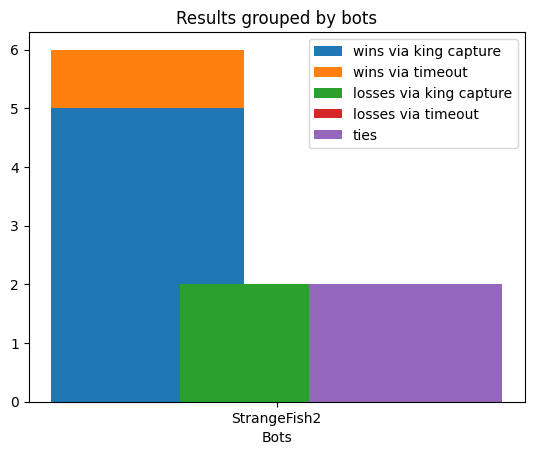

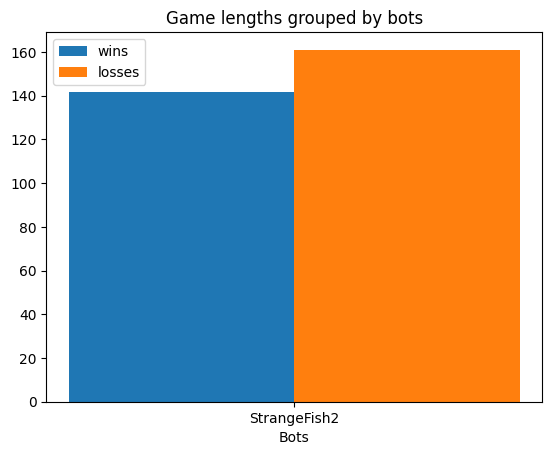

In [47]:
analyse("game_logs/unranked_games/u150/StrangeFish2")

## Replay

In [42]:
from strangefish.utilities.replay_window import MyReplayWindow

dir = "game_logs/ranked_games/batch_12 (0,125 - 75)"

i = 0

game_id = os.listdir(dir)[i]

game = GameHistory.from_file(os.path.join(dir, game_id, f"game_{game_id}.log"))

print(f"white - {game.get_white_player_name()}")
print(f"black - {game.get_black_player_name()}")
print(f"winner - {game.get_white_player_name() if game.get_winner_color() else game.get_black_player_name()}")


window = MyReplayWindow(game)

move = 0

for i in range(move * 4):
    window.go_forwards()

while window.update():
    window.draw()

white - Oracle
black - Zubat
winner - Zubat


In [5]:
game_hists[7].get_white_player_name(), game_hists[7].get_winner_color()

('StrangeFish2', True)

In [6]:
[game.get_win_reason() for game in game_hists]

[<WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.TIMEOUT: 2>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.KING_CAPTURE: 1>,
 <WinReason.MOV

In [ ]:
game

### Move score analysis

In [13]:
move_score_files = [(game_id, [f for f in os.listdir(os.path.join(path, game_id)) if re.match("move_scores*", f)][0]) for game_id in os.listdir(path)]
move_score_files = [os.path.join(path, game_id, f) for (game_id, f) in move_score_files]
# move_score_files = [pd.read_csv(file) for file in move_score_files]

EmptyDataError: No columns to parse from file

In [26]:
for file in move_score_files[2:3]:
    try:
        data = pd.read_csv(file)
        for i in range(len(data)):
            if data["move_number"][i] == data["move_number"][i+1] and data["analytical"][i] < data["analytical"][i+1] + 200:
                print(data["move_number"][i])
    except:
        continue


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14


In [20]:
data["gamble"][0]

418.0307647058824

In [27]:
file

'game_logs/remote_test_games/batch_4\\1691451636\\move_scores_zubat_1691451636_b.csv'

### Replay game

In [1]:
from game_log_reader.playback import playback
from strangefish.zubat_strategy.zubat_strategy import Zubat
from strangefish.models.uncertainty_lstm import uncertainty_lstm_1

In [2]:
game_id = 1694477815
game_path = f"game_logs/remote_test_games/batch_4/{game_id}/game_{game_id}.log"
game_hist = GameHistory.from_file(game_path)
color = False

NameError: name 'GameHistory' is not defined

In [5]:
zubat = Zubat(uncertainty_model=uncertainty_lstm_1('uncertainty_model/uncertainty_lstm_3/weights'), game_id=game_id)

In [ ]:
playback(game_hist, zubat, color)